#Problema 4 de la guía 7
##S. Schiavinato - LU 153/11

###Estimadores y intervalos de confianza

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import scipy.misc as misc
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Con las siguientes funciones obtengo puedo obtener los estimadores de la muestra

In [2]:
def s2(A):
    N, n = A.shape
    s2 = []
    for i in range(N):
        s2.append(np.sum((A[i,:] - np.mean(A[i,:]))**2) / (n -1 ))
    return np.array(s2)

def S2(A, μ):
    N, n = A.shape
    S2 = np.sum((A - μ)**2, axis = 1) / n
    return S2

Ahora vamos a graficar la población de cada estimador, dada una población inicial gaussiana con esperanza y varianza dada

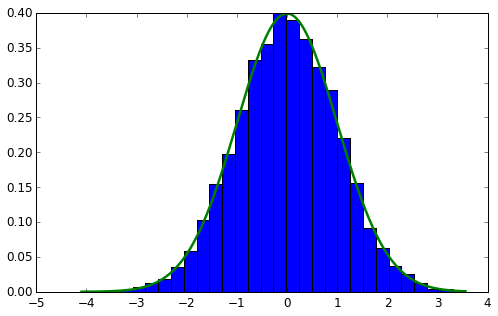

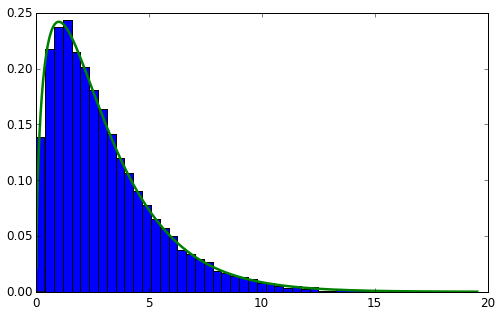

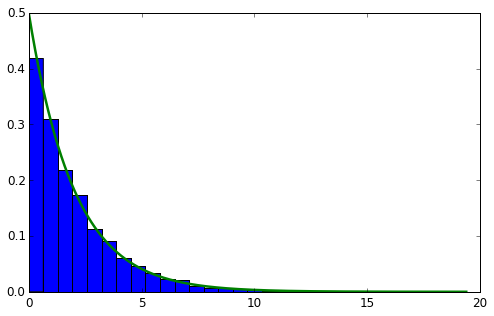

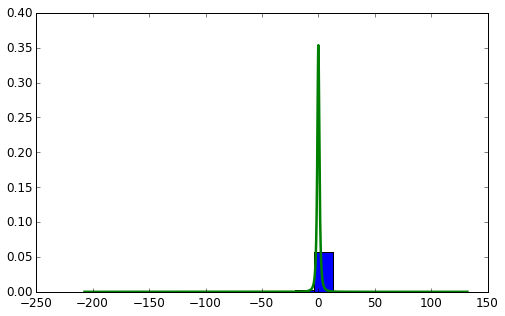

In [3]:
def G7E4_a(n = 3):
    μ = 10
    σ = 2
    N = 1e4
    α = 0.95
    A = rnd.normal(μ, σ, (N, n))
    x1 = np.sqrt(n)*(np.mean(A, axis = 1) - μ) / σ
    x2 = n * S2(A, μ) / σ**2
    x3 = (n-1) * s2(A) / σ**2
    x4 =  x1 * σ / np.sqrt(s2(A))
    
    plt.figure(1)
    h, bins, p = plt.hist(x1, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.norm(0,1).pdf(t))
    
    plt.figure(2)
    h, bins, p = plt.hist(x2, bins = 50, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.chi2(n).pdf(t))

    plt.figure(3)
    h, bins, p = plt.hist(x3, bins = 30, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.chi2(n - 1).pdf(t))

    plt.figure(4)
    h, bins, p = plt.hist(x4, bins = 20, normed = True);
    t = np.linspace(bins.min(), bins.max() , 10000)
    plt.plot(t, stats.t(n - 1).pdf(t));

G7E4_a()

σ**2 = 4 + 0.29 - 12.46


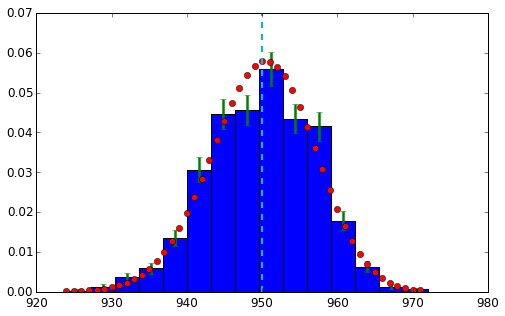

In [4]:
def G7E4_b_μ(n = 3):
    μ = 10
    σ = 2
    N = 1000
    α = 0.95
    C = []
    #Intervalo de t-student
    a, b = stats.chi2(n).interval(α)
    print("σ**2 = {} + {:.2f} - {:.2f}".format(σ**2, a*σ**2 / n, b * σ**2/n))
    for j in range(N):
        A = rnd.normal(μ, σ, (N, n))
        C.append(np.count_nonzero(np.bitwise_and(S2(A, μ) > a * σ**2 / n, S2(A, μ) < b * σ**2/n)))
    C = np.array(C)
    plt.figure(1)
    h, bins = np.histogram(C, bins = 15);
    plt.bar(bins[:-1], h/(np.diff(bins)*h.sum()), yerr = np.sqrt(h)/(np.diff(bins)*h.sum()), color = "b", ecolor = 'g', width = np.diff(bins))
    t = range(int(bins.min()), int(bins.max()))
    plt.plot(t, stats.binom(N, α).pmf(t), 'ro')
    plt.axvline(N*α, linestyle = "--", linewidth = 2, color = 'c')
    
G7E4_b_μ()

σ**2 = 4 + 0.10 - 14.76


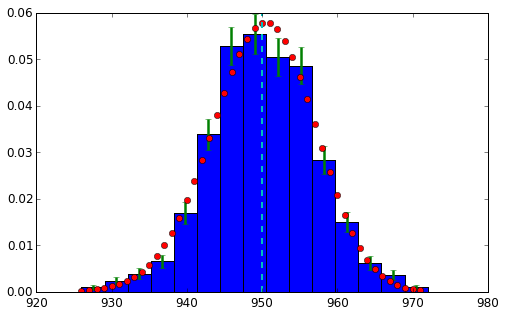

In [5]:
def G7E4_b_nμ(n = 3):
    μ = 10
    σ = 2
    N = 1000
    α = 0.95
    C = []
    #Intervalo de t-student
    a, b = stats.chi2(n-1).interval(α)
    print("σ**2 = {} + {:.2f} - {:.2f}".format(σ**2, a*σ**2 / (n-1), b * σ**2 / (n -1)))
    for j in range(N):
        A = rnd.normal(μ, σ, (N, n))
        C.append(np.count_nonzero(np.bitwise_and((n-1)*s2(A)/σ**2 < b, s2(A) > a * σ**2 / (n - 1))))
    C = np.array(C)
    plt.figure(1)
    h, bins = np.histogram(C, bins = 15);
    plt.bar(bins[:-1], h/(np.diff(bins)*h.sum()), yerr = np.sqrt(h)/(np.diff(bins)*h.sum()), color = "b", ecolor = 'g', width = np.diff(bins))
    t = range(int(bins.min()), int(bins.max()))
    plt.plot(t, stats.binom(N, α).pmf(t), 'ro')
    plt.axvline(N*α, linestyle = "--", linewidth = 2, color = 'c')
G7E4_b_nμ()

Calculamos el intervalo de confianza para el valor medio, conociendo la varianza de la muestra

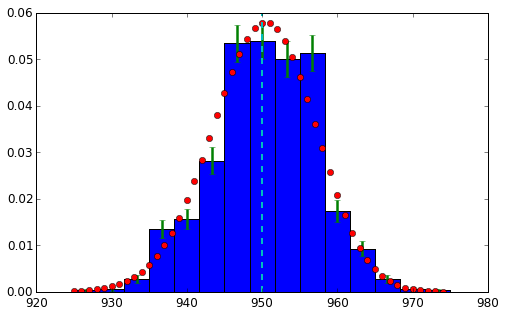

In [6]:
def G7E4_c_σ(n = 3):
    μ = 10
    σ = 2
    N = 1000
    α = 0.95
    C = []
    #Intervalo de t-student
    a = stats.norm(0,1).interval(α)[1]
    for j in range(N):
        A = rnd.normal(μ, σ, (N, n))
        C.append(np.count_nonzero(np.abs(np.mean(A, axis = 1) - μ) < a * σ/np.sqrt(n)))
    C = np.array(C)
    plt.figure(1)
    h, bins = np.histogram(C, bins = 15);
    plt.bar(bins[:-1], h/(np.diff(bins)*h.sum()), yerr = np.sqrt(h)/(np.diff(bins)*h.sum()), color = "b", ecolor = 'g', width = np.diff(bins))
    t = range(int(bins.min()), int(bins.max()))
    plt.plot(t, stats.binom(N, α).pmf(t), 'ro')
    plt.axvline(N*α, linestyle = "--", linewidth = 2, color = 'c')
G7E4_c_σ()

Hacemos lo mismo que el caso anterior, pero sin conocer la varianza. Usamos el intervalo provisto por la distribución t-student

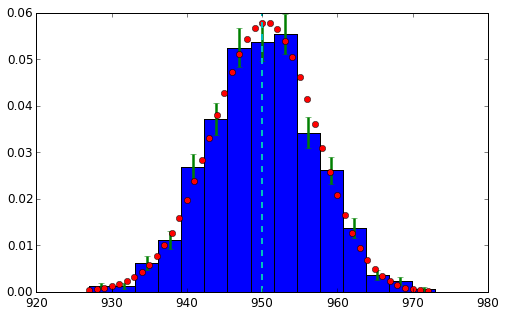

In [7]:
def G7E4_c_nσ(n = 3):
    μ = 10
    σ = 2
    N = 1000
    α = 0.95
    C = []
    #Intervalo de t-student
    a = stats.t(n - 1).interval(α)[1]
    for j in range(N):
        A = rnd.normal(μ, σ, (N, n))
        C.append(np.count_nonzero(np.abs(np.mean(A, axis = 1) - μ) < a * np.sqrt(s2(A)/n)))
    C = np.array(C)
    plt.figure(1)
    h, bins = np.histogram(C, bins = 15);
    plt.bar(bins[:-1], h/(np.diff(bins)*h.sum()), yerr = np.sqrt(h)/(np.diff(bins)*h.sum()), color = "b", ecolor = 'g', width = np.diff(bins))
    t = range(int(bins.min()), int(bins.max()))
    plt.plot(t, stats.binom(N, α).pmf(t), 'ro')
    plt.axvline(N*α, linestyle = "--", linewidth = 2, color = 'c')
G7E4_c_nσ()